In [40]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [41]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_1.csv")
# match_data_unfiltered.to_excel("exel_test.xlsx")

In [42]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 0
    elif result == "H":
        return 1
    elif result == "A":
        return 2
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [43]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
4891,14.05.2022,Mainz,Ein Frankfurt,2.0,2.0,0,1.0,2.0,A,13.0,...,2.001489,-1.884149,1.172358,-1.581157,1.868412,-1.545160,0.652603,-1.330148,849.372072,844.265646
4892,14.05.2022,M'gladbach,Hoffenheim,5.0,1.0,1,3.0,1.0,H,19.0,...,3.347095,-1.133621,1.647127,-4.249006,2.048918,-1.426219,2.062127,-3.467829,877.665071,855.590835
4893,14.05.2022,Stuttgart,FC Koln,2.0,1.0,1,1.0,0.0,H,24.0,...,1.491069,-1.100222,1.535998,-1.369941,0.963734,-1.335884,1.877641,-0.890119,734.655957,762.003692
4894,14.05.2022,Union Berlin,Bochum,3.0,2.0,1,2.0,0.0,H,17.0,...,2.870488,-1.234870,1.944127,-2.321089,2.570349,-0.727307,1.757577,-1.887840,746.240131,389.650242
4895,14.05.2022,Wolfsburg,Bayern Munich,2.0,2.0,0,1.0,2.0,A,10.0,...,1.994849,-1.248584,2.255671,-1.869960,1.949939,-0.849493,2.258790,-1.790906,825.333792,1118.372385


In [44]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
FTHG,1.000000,-0.115890,-0.158417,0.691083,-0.066105,0.282759,-0.121474,0.529431,-0.122165,-0.110952,-0.079891,0.024723,-0.068897,-0.128651,0.020357,-0.084379,0.065876,0.192706,-0.072156,0.817656,0.132531,-0.124136,-0.762975,0.213256,0.093173,-0.086369,-0.087695,0.165829,-0.045695
FTAG,-0.115890,1.000000,0.464526,-0.077238,0.681759,-0.110333,0.297404,-0.118181,0.534106,-0.010506,-0.051651,-0.042649,0.063109,0.091277,-0.060410,0.134629,-0.058063,-0.050974,0.172909,-0.124901,-0.766000,0.718631,0.130186,-0.090630,-0.066225,0.166395,0.083982,-0.028317,0.149910
FTR,-0.158417,0.464526,1.000000,-0.119945,0.291566,-0.090089,0.148044,-0.111597,0.261484,-0.008017,-0.042539,-0.037080,0.027992,0.016190,-0.069442,0.069038,-0.064325,-0.042381,0.092592,-0.139766,-0.368168,0.339708,0.150550,-0.060737,-0.052937,0.087979,0.063726,-0.028519,0.078586
HTHG,0.691083,-0.077238,-0.119945,1.000000,-0.078063,0.126746,-0.059225,0.339639,-0.082490,-0.049028,-0.053229,-0.037902,-0.006581,-0.111528,0.013452,-0.029325,0.020904,0.128916,-0.044013,0.574226,0.094772,-0.077146,-0.517303,0.160720,0.070694,-0.050489,-0.046817,0.110656,-0.026045
HTAG,-0.066105,0.681759,0.291566,-0.078063,1.000000,-0.017061,0.147804,-0.047770,0.331774,0.001003,-0.007671,0.032551,-0.000917,0.075908,-0.053471,0.064540,-0.000982,-0.027334,0.134705,-0.069947,-0.518497,0.500669,0.082534,-0.051828,-0.042754,0.128496,0.060822,-0.012263,0.119317
HS,0.282759,-0.110333,-0.090089,0.126746,-0.017061,1.000000,-0.316971,0.664345,-0.199804,-0.120852,0.039524,0.508935,-0.254611,-0.121168,0.055733,-0.103701,0.095520,0.063736,-0.189992,0.298766,0.126035,-0.175945,-0.254642,0.191916,0.108350,-0.166592,-0.102839,0.060782,-0.186790
AS,-0.121474,0.297404,0.148044,-0.059225,0.147804,-0.316971,1.000000,-0.199331,0.676266,0.064472,-0.076242,-0.244556,0.486411,0.108685,-0.061900,0.097864,-0.082758,-0.122667,0.106571,-0.164239,-0.277561,0.290737,0.141888,-0.155844,-0.127416,0.170413,0.104533,-0.119019,0.102988
HST,0.529431,-0.118181,-0.111597,0.339639,-0.047770,0.664345,-0.199331,1.000000,-0.087377,-0.052120,0.032089,0.311088,-0.159436,-0.116918,0.036144,-0.086779,0.089747,0.016793,-0.235931,0.479845,0.142784,-0.164671,-0.414579,0.199530,0.120579,-0.145003,-0.074459,0.005244,-0.223937
AST,-0.122165,0.534106,0.261484,-0.082490,0.331774,-0.199804,0.676266,-0.087377,1.000000,0.064358,-0.023169,-0.145561,0.322492,0.098727,-0.067452,0.092219,-0.059565,-0.153934,0.055267,-0.141689,-0.434150,0.417998,0.150607,-0.117306,-0.087985,0.143030,0.112253,-0.142614,0.044177
HF,-0.110952,-0.010506,-0.008017,-0.049028,0.001003,-0.120852,0.064472,-0.052120,0.064358,1.000000,0.350923,-0.083828,0.012621,0.322449,0.097079,0.076233,0.059689,-0.444572,-0.368586,-0.183680,-0.037472,-0.030441,0.070650,-0.184827,-0.065741,-0.027497,0.009197,-0.442968,-0.367831


In [45]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld"]]

correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG,HomeEloOld,AwayEloOld,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld
FTR,1.000000,-0.158417,0.464526,-0.028519,0.078586,-0.060737,-0.052937,0.087979,0.063726
FTHG,-0.158417,1.000000,-0.115890,0.165829,-0.045695,0.213256,0.093173,-0.086369,-0.087695
FTAG,0.464526,-0.115890,1.000000,-0.028317,0.149910,-0.090630,-0.066225,0.166395,0.083982
HomeEloOld,-0.028519,0.165829,-0.028317,1.000000,0.668072,0.317477,0.077238,0.042324,-0.058508
AwayEloOld,0.078586,-0.045695,0.149910,0.668072,1.000000,0.051041,-0.056731,0.315563,0.088859
HomeAttackOld,-0.060737,0.213256,-0.090630,0.317477,0.051041,1.000000,0.196511,0.013204,0.006045
HomeDefendOld,-0.052937,0.093173,-0.066225,0.077238,-0.056731,0.196511,1.000000,-0.013643,0.019664
AwayAttackOld,0.087979,-0.086369,0.166395,0.042324,0.315563,0.013204,-0.013643,1.000000,0.188030
AwayDefendOld,0.063726,-0.087695,0.083982,-0.058508,0.088859,0.006045,0.019664,0.188030,1.000000


In [46]:
X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [48]:
clf.predict(X_test)

array([2, 1, 2, ..., 2, 2, 0], dtype=int64)

In [49]:
result = clf.score(X_test, y_test)

In [50]:
result

0.3972772277227723

Confusion matrix, without normalization
[[117 167 122]
 [171 372 168]
 [144 202 153]]
Normalized confusion matrix
[[0.28817734 0.41133005 0.30049261]
 [0.24050633 0.52320675 0.23628692]
 [0.28857715 0.40480962 0.30661323]]


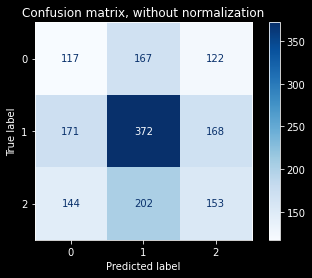

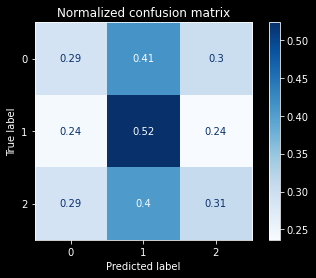

In [51]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Ensemble Learning

In [52]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [53]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]

In [54]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [55]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

In [56]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.388 (0.016)


KeyboardInterrupt: 

In [ ]:
models

{'lr': LogisticRegression(),
 'lda': LinearDiscriminantAnalysis(),
 'knn': KNeighborsClassifier(),
 'cart': DecisionTreeClassifier(),
 'svm': SVC(),
 'bayes': GaussianNB()}

#### Stack the single models to a combination

In [ ]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.499 (0.010)
>lda 0.498 (0.010)
>knn 0.419 (0.014)
>cart 0.390 (0.016)
>svm 0.487 (0.008)
>bayes 0.486 (0.010)
>stacking 0.500 (0.010)


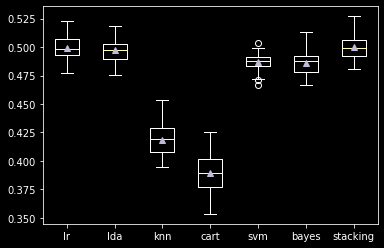

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Neural Network

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [57]:
X = match_data_unfiltered.loc[:, [
    "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.33,
#                                                     random_state=42)
X_train = X
y_train = y

print(X_train.shape)
print(X_test.shape)


(4896, 6)
(1616, 6)


In [58]:
y_train

,FTR
0,1
1,0
2,1
3,1
4,1
...,...
4891,0
4892,1
4893,1
4894,1


In [59]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [60]:
model = Sequential()
# model.add(Dense(500, activation='relu', input_dim=6))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(3, activation='softmax'))

model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# build the model
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 2.4867 - accuracy: 0.3987
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 1.6300 - accuracy: 0.4177
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 1.2624 - accuracy: 0.4291
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1856 - accuracy: 0.4318
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1027 - accuracy: 0.4606
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.4557
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0730 - accuracy: 0.4659
Epoch 8/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 0.4718
Epoch 9/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0512 - accuracy: 0.4808
Epoch 10/20
153/153 [==============================] - 0s 2ms/step - loss: 1.0569 - accuracy: 0.4712

In [62]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.49346405267715454% 
 Error on training data: 0.5065359473228455
Accuracy on test data: 0.48762375116348267% 
 Error on test data: 0.5123762488365173


In [63]:
# y_pred = [[1 if np.max(j)==i for i in j else 0] for j in pred_test]
y_pred = []
alpha = 0.15
for test in pred_test:
    # list_temp = []
    # for counter, j in enumerate(test):
    #     if np.max(test)==j:
    #         y_pred.append(counter)
    print(test[1])
    if test[1] > test[0]+alpha and test[1] > test[2]:
        y_pred.append(1)
    elif test[2] > test[0]+alpha:
        y_pred.append(2)
    else:
        y_pred.append(0)
        #     list_temp.append(1)
        # else:
        #     list_temp.append(0)
    # y_pred.append(list_temp)
y_pred
y_test_res = []
for test in y_test:
    # list_temp = []
    for counter, j in enumerate(test):
        if np.max(test)==j:
            y_test_res.append(counter)

0.4025957
0.5096868
0.1916968
0.41214964
0.39312974
0.27592123
0.5011132
0.28605524
0.48986998
0.53100866
0.5498683
0.5356362
0.20544308
0.5388363
0.442973
0.48994443
0.48729753
0.5339933
0.33666658
0.5620987
0.30151492
0.5089023
0.52584445
0.51982695
0.20460431
0.49975997
0.56217086
0.5116629
0.55824375
0.44355598
0.57108885
0.386883
0.30002645
0.2908342
0.36400396
0.5487093
0.41460046
0.39012855
0.5337315
0.49574503
0.31167033
0.5125034
0.45029628
0.5224654
0.49996138
0.39392245
0.5158849
0.49552408
0.40400174
0.42644188
0.3242477
0.44222876
0.38818946
0.52269804
0.4260932
0.5194252
0.43223011
0.5112784
0.44427308
0.47520646
0.42491898
0.3976441
0.36145112
0.5278666
0.48839703
0.4487709
0.34091237
0.5501372
0.34885326
0.37352976
0.5981611
0.5738969
0.50263256
0.51331973
0.35485736
0.34157884
0.4973889
0.51906997
0.48320428
0.34445366
0.50182146
0.58708596
0.510682
0.3453043
0.39449576
0.550193
0.13694678
0.42738977
0.48830202
0.50270396
0.3934949
0.45796683
0.2313641
0.24781929
0.513

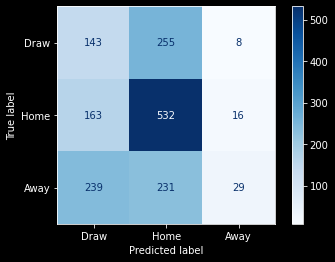

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_res, y_pred) #, labels=["Draw", "Home", "Away"])
cfd = ConfusionMatrixDisplay(cf, display_labels=["Draw", "Home", "Away"])
cfd.plot(cmap=plt.cm.Blues)

In [65]:
# class_names = {
#     'Away'
#     ,'Draw',
#     'Home'
# }
# # Plot non-normalized confusion matrix
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
# models['lr'],
#         X_test,
#         y_test,
#         #display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [66]:
y

,FTR
0,1
1,0
2,1
3,1
4,1
...,...
4891,0
4892,1
4893,1
4894,1


In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend, callbacks
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X.shape[1]
print(n_cols_2)

#add layers to model
model.add(Dense(500, activation='relu', input_dim=6))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])
model.compile(metrics=['accuracy'], optimizer='rmsprop', 
              loss='categorical_crossentropy')
# K.set_value(model.optimizer.learning_rate, 0.01)

# early_stopping_monitor = EarlyStopping(patience=3)

# es = callbacks.EarlyStopping(monitor='val_loss', 
#                                    mode='min',
#                                    patience=10, 
#                                    restore_best_weights=True) 


history = model.fit(X_train, y_train,  epochs=20, validation_split=0.3) #, callbacks=[early_stopping_monitor]) #callbacks=[es],

6
Epoch 1/20
108/108 [==============================] - 1s 4ms/step - loss: 3.8959 - accuracy: 0.3977 - val_loss: 4.5076 - val_accuracy: 0.3165
Epoch 2/20
108/108 [==============================] - 0s 3ms/step - loss: 1.6443 - accuracy: 0.4103 - val_loss: 6.0036 - val_accuracy: 0.4377
Epoch 3/20
108/108 [==============================] - 0s 3ms/step - loss: 1.2264 - accuracy: 0.4126 - val_loss: 1.6875 - val_accuracy: 0.3165
Epoch 4/20
108/108 [==============================] - 0s 3ms/step - loss: 1.0868 - accuracy: 0.4514 - val_loss: 1.0722 - val_accuracy: 0.4418
Epoch 5/20
108/108 [==============================] - 0s 3ms/step - loss: 1.0626 - accuracy: 0.4739 - val_loss: 1.3065 - val_accuracy: 0.4527
Epoch 6/20
108/108 [==============================] - 0s 4ms/step - loss: 1.0504 - accuracy: 0.4888 - val_loss: 1.0582 - val_accuracy: 0.4765
Epoch 7/20
108/108 [==============================] - 0s 3ms/step - loss: 1.0531 - accuracy: 0.4882 - val_loss: 1.0885 - val_accuracy: 0.4908
Epoc

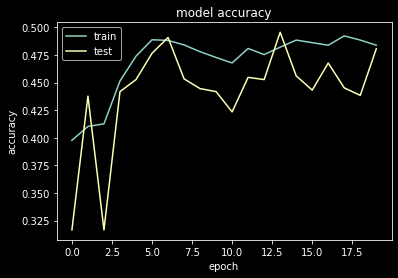

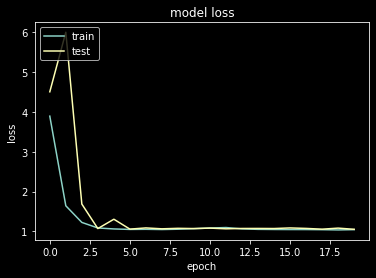

In [74]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

# summarize history for loss

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [69]:
models['lr']

LogisticRegression()

In [70]:
results

[array([0.51632653, 0.48723187, 0.50459653, 0.48518897, 0.50868233,
        0.49489796, 0.50970378, 0.49336057, 0.49642492, 0.50766088,
        0.49285714, 0.48621042, 0.49336057, 0.51378958, 0.49948927,
        0.50510204, 0.49029622, 0.49336057, 0.49131767, 0.51072523,
        0.5       , 0.50868233, 0.49438202, 0.49131767, 0.49642492,
        0.49795918, 0.52298264, 0.49642492, 0.49846782, 0.49540347,
        0.47755102, 0.49336057, 0.50970378, 0.51481103, 0.50561798,
        0.51326531, 0.48927477, 0.49336057, 0.51174668, 0.49029622,
        0.50204082, 0.51378958, 0.49336057, 0.50051073, 0.47906027,
        0.49795918, 0.48621042, 0.50663943, 0.50561798, 0.49846782]),
 array([0.51530612, 0.48518897, 0.50868233, 0.48621042, 0.49948927,
        0.49489796, 0.50153218, 0.49131767, 0.49948927, 0.50868233,
        0.48979592, 0.48621042, 0.49336057, 0.51378958, 0.49438202,
        0.50306122, 0.48927477, 0.49233912, 0.48927477, 0.50766088,
        0.50306122, 0.50153218, 0.49846782, 0.